# Random forest

### Fit
1. Create $n$ decision trees
2. Train each decision tree on a random subset of the dataset using bootstrapping

### Predict
1. Majority vote of the labels of all the decision trees

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from DecisionTree import DecisionTree
from collections import Counter

In [2]:
def plot_2d_clf_problem(X, y, h=None):
    '''
    Plots a two-dimensional labeled dataset (X,y) and, if function h(x) is given, 
    the decision surfaces.
    '''
    assert X.shape[1] == 2, "Dataset is not two-dimensional"
    if h!=None : 
        # Create a mesh to plot in
        r = 0.03  # mesh resolution
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, r),
                             np.arange(y_min, y_max, r))
        XX=np.c_[xx.ravel(), yy.ravel()]
        try:
            Z_test = h(XX)
            if Z_test.shape == ():
                # h returns a scalar when applied to a matrix; map explicitly
                Z = np.array(list(map(h,XX)))
            else :
                Z = Z_test
        except ValueError:
            # can't apply to a matrix; map explicitly
            Z = np.array(list(map(h,XX)))
        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        plt.contourf(xx, yy, Z, cmap=plt.cm.Pastel1)

    # Plot the dataset
    plt.scatter(X[:,0],X[:,1], c=y, cmap=plt.cm.tab20b, marker='o', s=50);

In [3]:
def bootstrap(X: np.ndarray) -> np.ndarray:
    """
    Function for drawing random sample indices with replacement.
    Bootstrapping is a resampling technique used to draw random samples from a dataset with replacement.
    
    Parameters
    ----------
    X : numpy.ndarray
        Data to sample indices from.
    
    Returns
    -------
    new_idxs : numpy.ndarray
        Array of random sample indices of shape (n_samples,)
    """
    n_samples = X.shape[0]
    new_idxs = np.random.choice(n_samples, n_samples, replace=True)
    return new_idxs

class RandomForest:

    def __init__(self, min_samples_split: int = 2, max_depth: int = 100, n_feats=None, n_trees: int = 100) -> None:
        """
        Random Forest classifier.

        Parameters
        ----------
        min_samples_split : int, default=2
            Minimum number of samples required to split a node.

        max_depth : int, default=100
            Maximum depth of the tree.

        n_feats : int, default=None
            Number of features to choose from when performing a node split.

        n_trees : int, default=100
            Number of decision trees to train.
        """
        self.min_samples_split = min_samples_split
        self.max_depth = max_depth
        self.n_feats = n_feats
        self.n_trees = n_trees

    def _most_common_label(self, y: np.ndarray) -> int:
        """
        Helper method for determining the most common label in an array.

        Parameters
        ----------
        y : np.ndarray
            Target values of shape (n_samples,).

        Returns
        -------
        label : int
            Most common target value.
        """
        counter = Counter(y)
        return counter.most_common(1)[0][0]

    def fit(self, X: np.ndarray, y: np.ndarray) -> None:
        """
        Build a Random Forest.

        Parameters
        ----------
        X : numpy.ndarray
            Training data of shape (n_samples, n_features).

        y : numpy.ndarray
            Target values of shape (n_samples,).

        Returns
        -------
        None
        """

        # Initialize an empty list for decision trees
        self.trees = []

        # Create n decision trees
        for _ in range(self.n_trees):
            new_tree = DecisionTree(self.min_samples_split, self.max_depth, self.n_feats)
            new_data_idxs = bootstrap(X)
            # Train each tree on a random subset
            new_tree.fit(X[new_data_idxs], y[new_data_idxs])
            self.trees.append(new_tree)

    def predict(self, X: np.ndarray) -> np.ndarray:
        """
        Predict using the Random Forest.

        Parameters
        ----------
        X : numpy.ndarray
            Samples of shape (n_samples, n_features).

        Returns
        -------
        y : numpy.ndarray
            Predicted values of shape (n_samples,).
        """
        # Predict using every trained decision tree
        results = [tree.predict(X) for tree in self.trees]
        results = np.array(results).T

        # Majority vote
        final = [self._most_common_label(y) for y in results]
        return np.array(final)

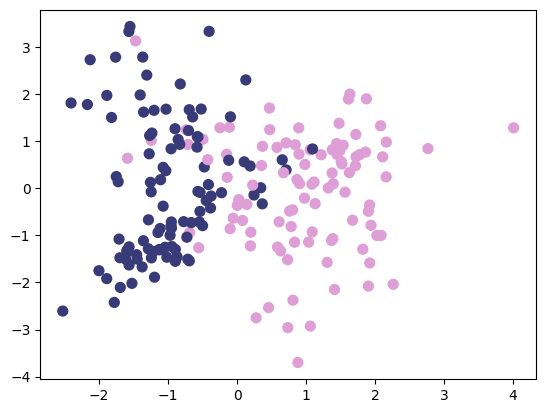

In [4]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

X, y = make_classification(n_samples=200, n_classes=2, n_features=2, n_informative=2, n_redundant=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)
plot_2d_clf_problem(X, y)

Accuracy test: 0.825


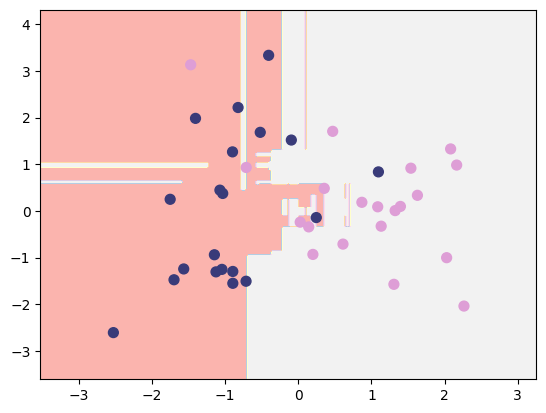

In [5]:
model = RandomForest(n_trees=10)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f'Accuracy test: {np.mean(y_pred == y_test)}')
plot_2d_clf_problem(X_test, y_test, model.predict)

In [6]:
from sklearn import datasets

data = datasets.load_breast_cancer()
X, y = data['data'], data['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1234)

In [7]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f'Accuracy test: {np.mean(y_pred == y_test)}')

Accuracy test: 0.9122807017543859
